In [108]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_venn as venn
from matplotlib_venn import venn3
from textwrap import wrap
import venn
from venn import venn
import re
import seaborn as sns
from pandas import DataFrame
import math
#import Math
#from Math import Round
import os
for dirname, _, filenames in os.walk('/Users/tianyisun/Desktop/NLQbatches/batch1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_annotationtask_sql_errorcategory.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/record_id-code_Krippendroffis_alpha.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/annotation_feedback_coded_tianyi.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_category_Fleiss_kappa.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/description-code.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/.DS_Store
/Users/tianyisun/Desktop/NLQbatches/batch1/46iter1_stability.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/First-round error type annotation.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/anntask.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/ann3_description.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/descri-code_Fleiss_kappa.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_anntask_sql_type.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/mapping.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/annotation_feedback_coded_zheng_v2.csv
/Users/tiany

In [194]:
stability_b1 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_category_stability.csv')
stability_b1 = stability_b1.T
stability_b1.columns = stability_b1.iloc[0]
stability_b1 = stability_b1[1:]

stability_b2 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_category_stability.csv')
stability_b2 = stability_b2.T
stability_b2.columns = stability_b2.iloc[0]
stability_b2 = stability_b2[1:]

stability_b3 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_sql-category_stability.csv')
stability_b3 = stability_b3.T
stability_b3.columns = stability_b3.iloc[0]
stability_b3 = stability_b3[1:]

stability_b4 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/correct_batch4_category_stability.csv')

st_b5 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/correct_batch5_category_stability.csv')
stability_b5 = st_b5.T
stability_b5.columns = stability_b5.iloc[0]
stability_b5 = stability_b5[1:]

stability_b6 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/correct_batch6_category_stability.csv')
stability_b7 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch7/correct_batch7_category_stability.csv')

In [213]:
stability_b6

,Unnamed: 0,intersection2,union,inter2/union
Unnamed: 0,,,,
C,C,203.0,305.0,0.665574
E,E,237.0,285.0,0.831579
B,B,284.0,423.0,0.671395
L,L,319.0,413.0,0.772397
F,F,180.0,259.0,0.694981
D,D,176.0,231.0,0.761905
K,K,58.0,92.0,0.630435
N,N,74.0,110.0,0.672727
A,A,142.0,203.0,0.699507


In [121]:
# check for duplication 
# replace 'cate_bwhich' with other batches, i.e., 'cate_b1'.
def check_for_dulplication(cate_bwhich):
    cate_bwhich['s+c'] = cate_bwhich['code']
    for i in cate_bwhich.index:
        cate_bwhich['s+c'][i] = str(cate_bwhich['sql_id'][i]) + str(cate_bwhich['code'][i])

    return cate_bwhich[cate_bwhich['s+c'].duplicated() == True]

In [122]:
check_for_dulplication(cate_b4)

/var/folders/gh/3pd23sd51hn2p7774mv2zt4r0000gn/T/ipykernel_4127/2500995756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cate_bwhich['s+c'][i] = str(cate_bwhich['sql_id'][i]) + str(cate_bwhich['code'][i])


,sql_id,username,code,s+c


---

In [195]:
stability_b1 = stability_b1.sort_index()
stability_b4.index = stability_b4['Unnamed: 0']
stability_b6.index = stability_b6['Unnamed: 0']
stability_b7.index = stability_b7['Unnamed: 0']

In [173]:
#stability_b1 = sorted(stability_b1['union'])
#stability_b1['union']    V
#stability_b2['union']    V
#stability_b3['union']
#stability_b4['union']    V
#stability_b5['union']
#stability_b6['union']    
#stability_b7['union']    V

In [196]:
df2 =pd.merge(stability_b1['union'],stability_b2['union'], how = 'outer', left_index=True, right_index=True)
df2 =pd.merge(df2,stability_b3['union'], how = 'outer', left_index=True, right_index=True)
df2 =pd.merge(df2,stability_b4['union'], how = 'outer', left_index=True, right_index=True)
df2 =pd.merge(df2,stability_b5['union'], how = 'outer', left_index=True, right_index=True)
df2 =pd.merge(df2,stability_b6['union'], how = 'outer', left_index=True, right_index=True)
df2 =pd.merge(df2,stability_b7['union'], how = 'outer', left_index=True, right_index=True)


/var/folders/gh/3pd23sd51hn2p7774mv2zt4r0000gn/T/ipykernel_4127/1495547658.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'union_x'} in the result is deprecated and will raise a MergeError in a future version.
  df2 =pd.merge(df2,stability_b4['union'], how = 'outer', left_index=True, right_index=True)
/var/folders/gh/3pd23sd51hn2p7774mv2zt4r0000gn/T/ipykernel_4127/1495547658.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'union_x'} in the result is deprecated and will raise a MergeError in a future version.
  df2 =pd.merge(df2,stability_b6['union'], how = 'outer', left_index=True, right_index=True)


In [197]:
df2.columns = ['cate_b1_sum', 'cate_b2_sum','cate_b3_sum','cate_b4_sum','cate_b5_sum','cate_b6_sum','cate_b7_sum']
df2 = df2.fillna(0)
df2 = df2[:-1]

In [198]:
df2

,cate_b1_sum,cate_b2_sum,cate_b3_sum,cate_b4_sum,cate_b5_sum,cate_b6_sum,cate_b7_sum
A,13,14,12,31.0,41,203.0,129.0
B,29,13,20,44.0,86,423.0,192.0
C,19,15,10,33.0,63,305.0,102.0
D,17,23,16,55.0,74,231.0,69.0
E,18,12,10,31.0,47,285.0,90.0
F,16,25,19,27.0,60,259.0,89.0
G,2,4,1,0.0,0,0.0,0.0
H,12,2,0,0.0,0,0.0,0.0
I,25,19,6,0.0,0,0.0,0.0
K,3,1,2,6.0,13,92.0,36.0


---
---

In [199]:
#model1=1234
#model2=5
#model3=67
#, columns = ['model1_catsum','model2_catsum','model3_catsum']
model_df = pd.DataFrame(index = df2.index)

column_names = ['cate_b1_sum', 'cate_b2_sum', 'cate_b3_sum', 'cate_b4_sum']
model_df['model1_catsum']= df2[column_names].sum(axis=1)
model_df['model2_catsum'] = df2['cate_b5_sum']
cn=['cate_b6_sum', 'cate_b7_sum']
model_df['model3_catsum'] = df2[cn].sum(axis=1)
model_df

/var/folders/gh/3pd23sd51hn2p7774mv2zt4r0000gn/T/ipykernel_4127/2362940736.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  model_df['model1_catsum']= df2[column_names].sum(axis=1)


,model1_catsum,model2_catsum,model3_catsum
A,31.0,41,332.0
B,44.0,86,615.0
C,33.0,63,407.0
D,55.0,74,300.0
E,31.0,47,375.0
F,27.0,60,348.0
G,0.0,0,0.0
H,0.0,0,0.0
I,0.0,0,0.0
K,6.0,13,128.0


In [202]:
model_df['model2_catsum'] = pd.to_numeric(model_df['model2_catsum'], errors = 'coerce')

/var/folders/gh/3pd23sd51hn2p7774mv2zt4r0000gn/T/ipykernel_4127/2497988331.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, fontsize=40)


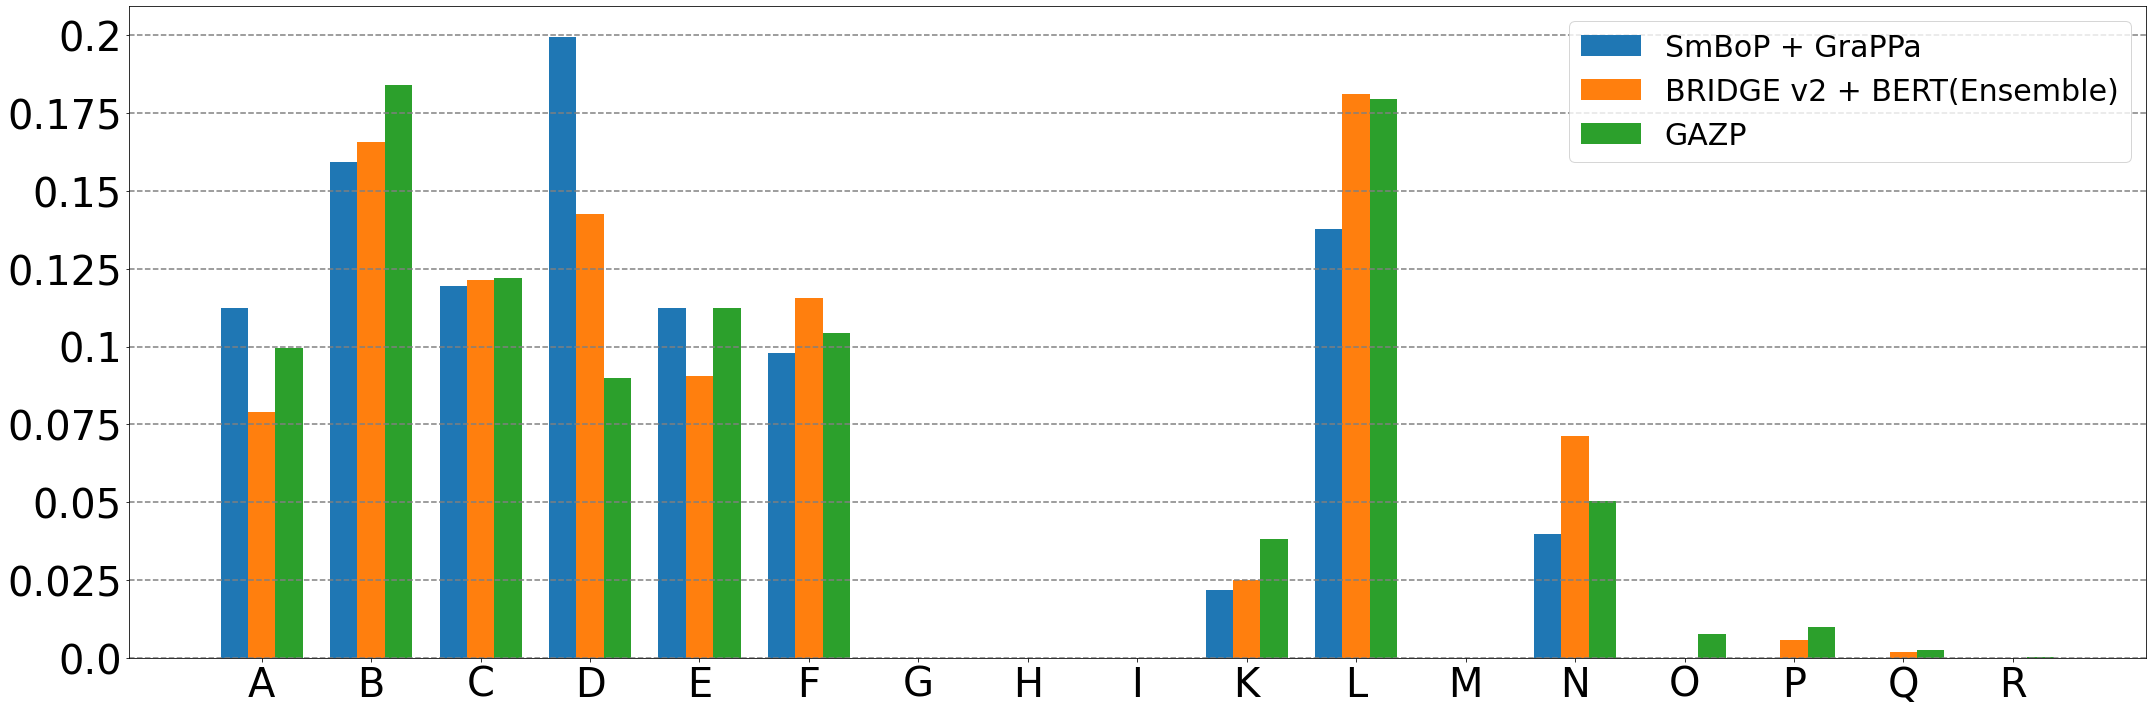

In [206]:
labels = model_df.index
md1 = round(model_df.model1_catsum/sum(model_df.model1_catsum), 4)
md2 = round(model_df.model2_catsum/sum(model_df.model2_catsum), 4)
md3 = round(model_df.model3_catsum/sum(model_df.model3_catsum), 4)

x = np.arange(len(labels)) 
y = [0.000, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150, 0.175, 0.200]
width = 0.25 

fig, ax = plt.subplots(figsize=(30, 10))
# 
rects1 = ax.bar(x - width, md1, width, label='SmBoP + GraPPa')
rects2 = ax.bar(x, md2, width, label='BRIDGE v2 + BERT(Ensemble)')
rects3 = ax.bar(x + width, md3,  width, label='GAZP')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Frequency of Occurrence', fontsize=50)
#ax.set_xlabel('Error Category', fontsize=50)
# Bar chart for counting errors for each category
# ax.set_title('A comparison of the frequency of occurence of each error category generated by the three models',fontsize=50,fontweight="bold")
ax.set_xticks(x)
#ax.set_xticklabels(labels, fontsize=30,rotation =90)
ax.set_xticklabels(labels, fontsize=40)
ax.set_yticklabels(y, fontsize=40)
#ax.set_yticks(y)
ax.legend(fontsize=30, loc=1, prop={'size': 30})
for i in y:
    plt.axhline(y=i, color = 'grey', linestyle = '--')
#plt.savefig('newFeb.4/category freq(all).png')
fig.tight_layout()
plt.show()


In [215]:
# delete G H I M 
# batch6 R
md1

A    31.0
B    44.0
C    33.0
D    55.0
E    31.0
F    27.0
G     0.0
H     0.0
I     0.0
K     6.0
L    38.0
M     0.0
N    11.0
O     0.0
P     0.0
Q     0.0
R     0.0
Name: model1_catsum, dtype: float64

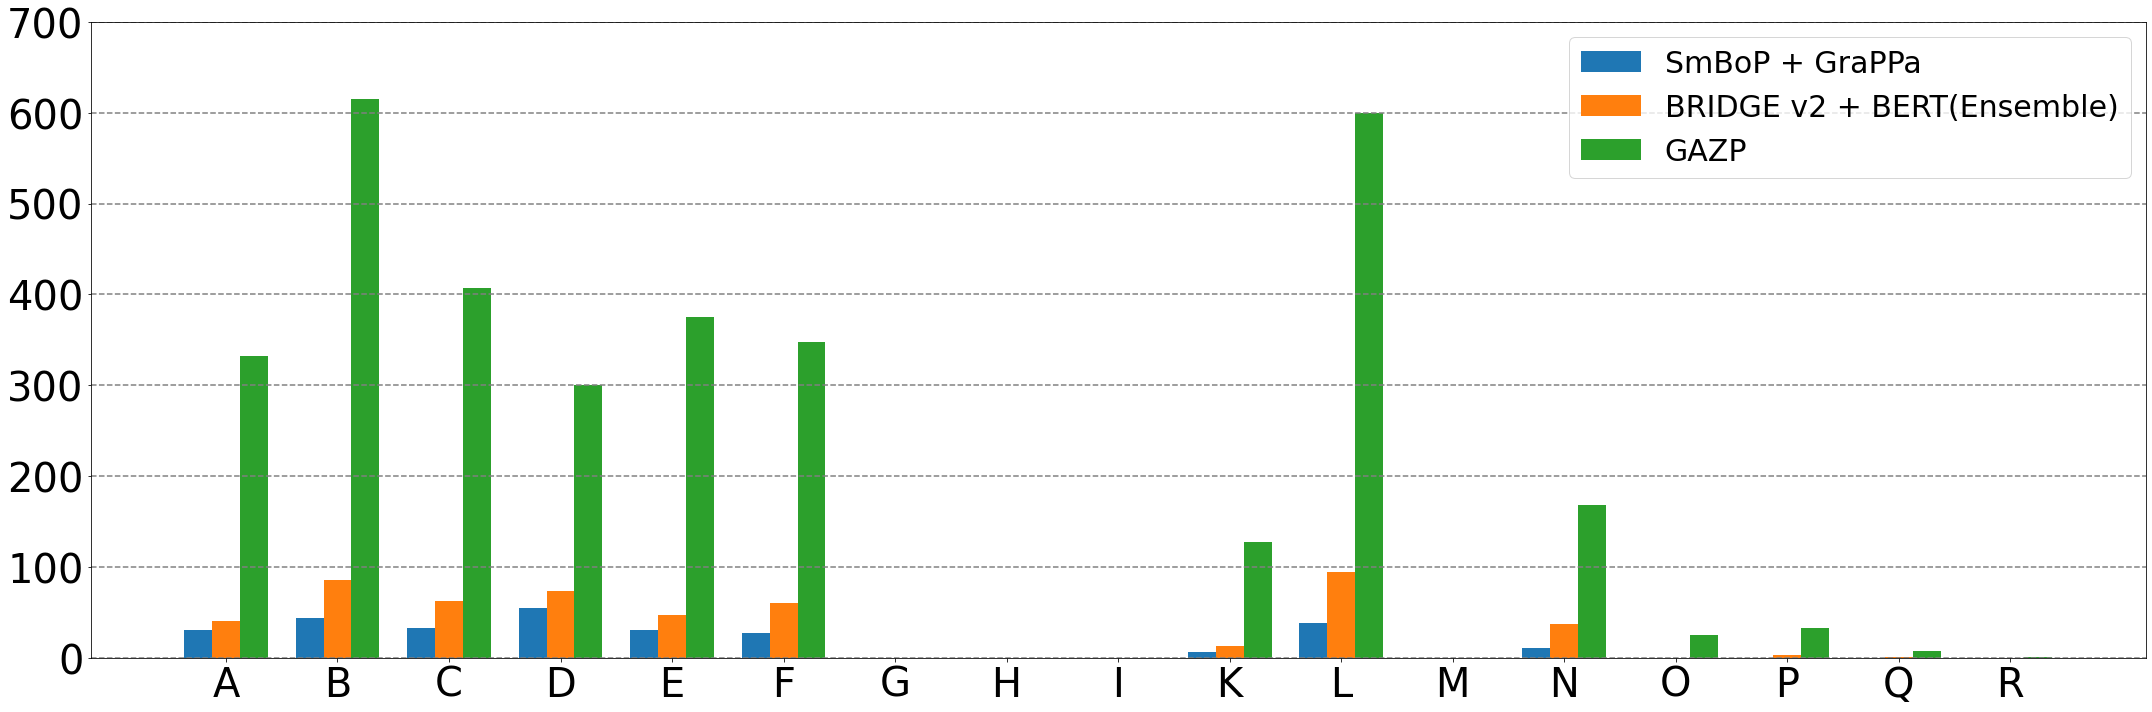

In [207]:
labels = model_df.index
md1 = model_df.model1_catsum
md2 = model_df.model2_catsum
md3 = model_df.model3_catsum

x = np.arange(len(labels)) 
y = [0,100,200,300,400, 500, 600, 700]
width = 0.25 

fig, ax = plt.subplots(figsize=(30, 10))

rects1 = ax.bar(x - width, md1, width, label='SmBoP + GraPPa')
rects2 = ax.bar(x, md2, width, label='BRIDGE v2 + BERT(Ensemble)')
rects3 = ax.bar(x + width, md3, width, label='GAZP')

#ax.hlines(y=[0,100,200,300,400, 500, 600, 700, 800], xmin=0, xmax=len(x), colors='grey', linestyles='--', lw=2)
# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Number of SQL queries', fontsize=50)
#ax.set_xlabel('Error Category', fontsize=50)
# Bar chart for counting errors for each category
# ax.set_title('A comparison of the frequency of occurence of each error category generated by the three models',fontsize=50,fontweight="bold")
ax.set_xticks(x)
#ax.set_xticklabels(labels, fontsize=30,rotation =90)
ax.set_xticklabels(labels, fontsize=40)
ax.set_yticks(y)
ax.set_yticklabels(y, fontsize=40)
ax.legend(fontsize=30, loc=1, prop={'size': 30})
for i in y:
    plt.axhline(y=i, color = 'grey', linestyle = '--')

#plt.savefig('newFeb.4/category count(all).png')
fig.tight_layout()
plt.show()
